In [1]:
#Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [2]:
#Read and clean data
df = pd.read_csv('./df_6dB_valve_fe_ta_imb.csv')
df.drop(['Unnamed: 0'],axis = 1, inplace = True)
df.drop(df.iloc[:,13:], axis=1, inplace = True)

In [3]:
df.columns

Index(['mfccs0', 'mfccs1', 'mfccs2', 'mfccs3', 'mfccs4', 'mfccs5', 'mfccs6',
       'mfccs7', 'mfccs8', 'mfccs9', 'mfccs10', 'mfccs11', 'mfccs12'],
      dtype='object')

In [4]:
# K-means clustering

In [5]:
# z-score normalisation
metrics_normalized=(df-df.mean())/df.std()
metrics_normalized = metrics_normalized.rename(columns={'mfccs0': 'mfccs0_zscore',
                                                        'mfccs1': 'mfccs1_zscore',
                                                        'mfccs2': 'mfccs2_zscore',
                                                        'mfccs3': 'mfccs3_zscore',
                                                        'mfccs4': 'mfccs4_zscore',
                                                        'mfccs5': 'mfccs5_zscore',
                                                        'mfccs6': 'mfccs6_zscore',
                                                        'mfccs7': 'mfccs7_zscore',
                                                        'mfccs8': 'mfccs8_zscore',
                                                        'mfccs9': 'mfccs9_zscore',
                                                        'mfccs10': 'mfccs10_zscore',
                                                        'mfccs11': 'mfccs11_zscore',
                                                        'mfccs12': 'mfccs12_zscore'})

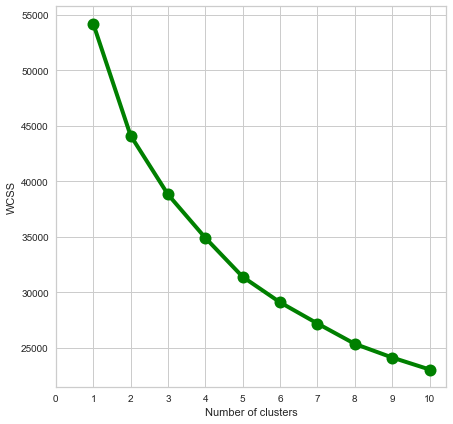

In [6]:
# find the optimal number of clusters using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(metrics_normalized)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Elbow Method to determine the number of clusters to be formed:


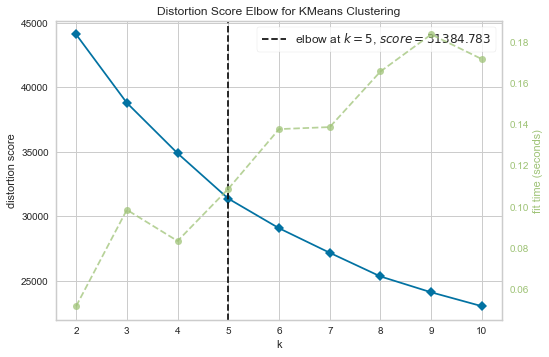

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(metrics_normalized)
Elbow_M.show()

In [8]:

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++').fit(metrics_normalized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
metrics_normalized = metrics_normalized.join(cluster_labels.to_frame())

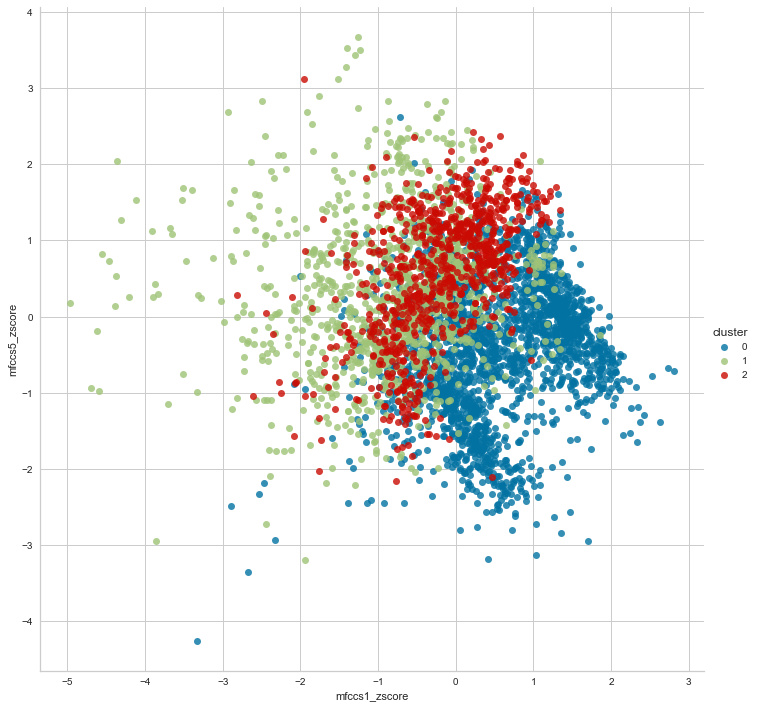

In [9]:
sns.lmplot(x='mfccs1_zscore', y='mfccs5_zscore',  height=10, data=metrics_normalized,
           fit_reg=False, hue='cluster')

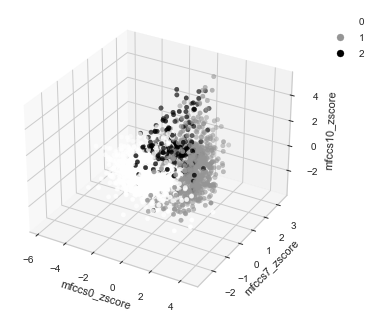

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

df = metrics_normalized


fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['mfccs0_zscore']
y = df['mfccs7_zscore']
z = df['mfccs10_zscore']

ax.set_xlabel("mfccs0_zscore")
ax.set_ylabel("mfccs7_zscore")
ax.set_zlabel("mfccs10_zscore")


sc = ax.scatter(x, y, z, marker='o',  c=kmeans.labels_)
# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

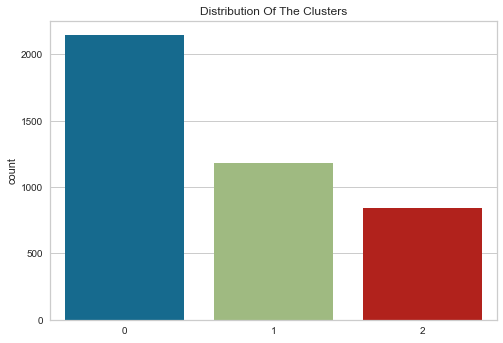

In [11]:
#Plotting countplot of clusters
pl = sns.countplot(x=kmeans.labels_)
pl.set_title("Distribution Of The Clusters")
plt.show()